# Information model and estimator experiments

Various experiments involving the information models as well as the scores.

In [1]:
# allow imports from the main source directory
import sys
sys.path.append('..')
import logging

import math
import itertools
import random
import logging
from functools import partial

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation, rc

from IPython.display import display, HTML
from Environment import SoilMoistureEnvironment, EpidemicSpreadEnvironment
from InformationModel import GaussianProcessScalarFieldIM, DiskEstimateScalarFieldIM, PointEstimateScalarFieldIM
from InformationModel import im_score, im_score_rmse, im_score_rmse_weighted

logging.basicConfig(level=logging.WARNING)

In [15]:
# utility function to visualize both the environment and the information model
def visualize_env_im(env, im):
    fig, (axenv, aximval, aximunc) = plt.subplots(1, 3, figsize = (12, 4))
    axenv.imshow(env.value, vmin=0, vmax=1.0, cmap="gray")
    axenv.set_title("Environment")
    aximval.imshow(im.value, vmin=0, vmax=1.0, cmap="gray")
    aximval.set_title("IM value")
    aximunc.imshow(im.uncertainty, vmin=0, vmax=1.0, cmap="gray")
    aximunc.set_title("IM uncertainty")


## Example 1: soil moisture environment

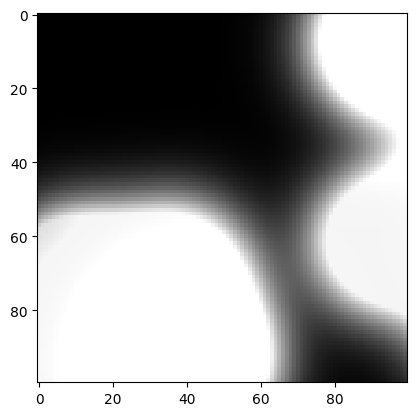

In [4]:
# create an environment to observe
env = SoilMoistureEnvironment("water", width = 100, height = 100, seed=1)
plt.imshow(env.value, vmin=0, vmax=1.0, cmap="gray")

In [5]:
# generate a series random observations
observations = []
for i in range(100):
    x = random.randint(0, env.width-1)
    y = random.randint(0, env.height-1)
    value = env.value[x,y]
    obs = {"x": x, "y": y, "value": value}
    observations.append(obs)

/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Score_rmse = -0.10124329144058886


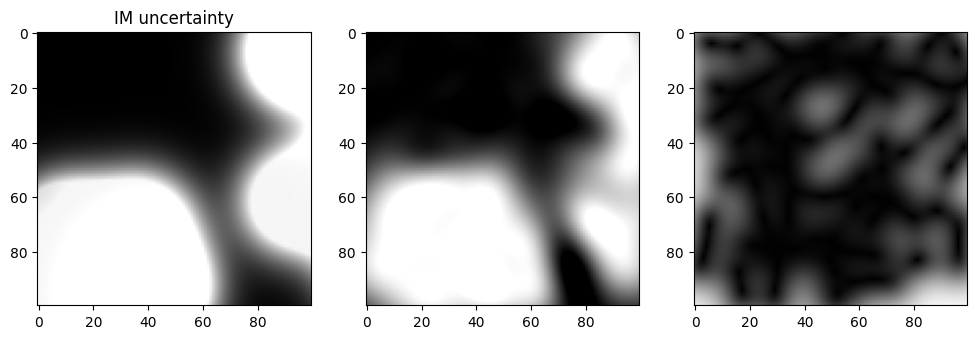

In [6]:
im = GaussianProcessScalarFieldIM(env.width, env.height)
for obs in observations:
    im.add_observation(obs)
im.proceed(1)
visualize_env_im(env, im)
score_rmse = im_score_rmse(im, env)
print(f"Score_rmse = {score_rmse}")

Score_rmse = -0.3001919886467765


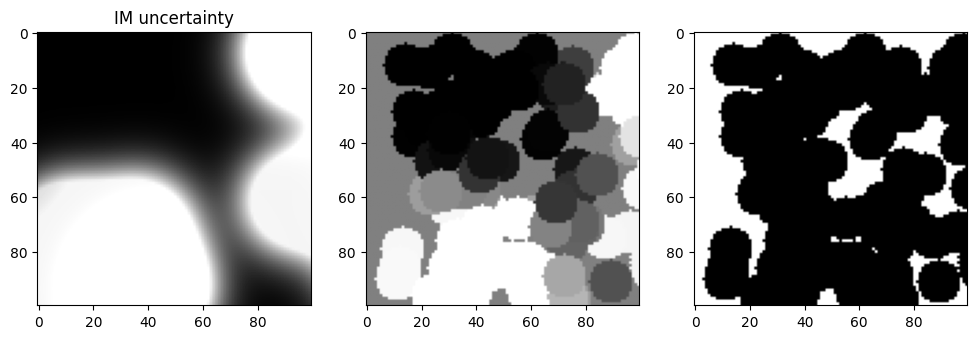

In [7]:
im = DiskEstimateScalarFieldIM(env.width, env.height, disk_radius=None, default_value=0.5)
for obs in observations:
    im.add_observation(obs)
im.proceed(1)
visualize_env_im(env, im)
score_rmse = im_score_rmse(im, env)
print(f"Score_rmse = {score_rmse}")

In [8]:
mask = np.ones([100, 100])
score_rmse_weighted = im_score_rmse_weighted(im, env, mask)
print(f"Score_rmse_weighted = {score_rmse_weighted}")

Score_rmse_weighted = -0.3001919886467765


# Experiments with the epidemic spread environment

In [11]:
# Epidemic spread with immunity mask
width = 10 # 1000
height = 10 # 2000
immunity_mask = np.zeros((width, height))
for i in range(width):
    for j in range(2):
        immunity_mask[i, height // 2 + j] = -2.0

#spread_dimension = int(math.sqrt(width) / 6) * 2 + 3
spread_dimension = 11
print(spread_dimension)
infection_seeds = 1 # 3 * max(int(width / 30), 1)
p_transmission = 0.25
# seeds 1*, 0.15 looks good for ccr
# seeds 3*, 0.25 looks good for tylcv
env = EpidemicSpreadEnvironment("crop", width, height, seed=1, infection_duration = 5, 
                                p_transmission = p_transmission, spread_dimension=spread_dimension, 
                                infection_seeds = infection_seeds, immunity_mask=immunity_mask)
for t in range(10):
    env.proceed(1.0)

11


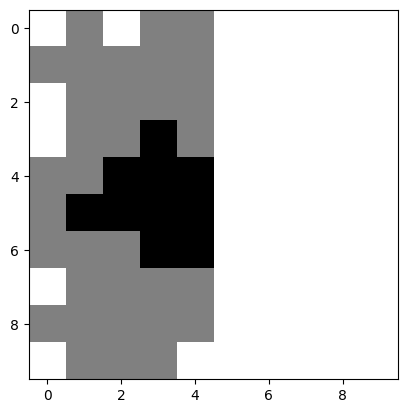

In [12]:
plt.imshow(env.value, vmin=0, vmax=1.0, cmap="gray")

In [25]:
def estimate_with_disk(env, observations): 
    im = DiskEstimateScalarFieldIM(env.width, env.height, disk_radius=None, default_value=0.5)
    for obs in observations:
        im.add_observation(obs)
    im.proceed(1)
    return im

#visualize_env_im(env, im)
#score_rmse = im_score_rmse(im, env)
#print(f"Score_rmse = {score_rmse}")

In [26]:
def estimate_with_GP(env, observations):
    im = GaussianProcessScalarFieldIM(env.width, env.height)
    for obs in observations:
        im.add_observation(obs)
    im.proceed(1)
    return im

#    visualize_env_im(env, im)
#    score_rmse = im_score_rmse(im, env)
#    print(f"Score_rmse = {score_rmse}")


In [31]:
# generate a series random observations
observations = []
ims_gp = []
ims_disk = []
scores_gp = []
scores_disk = []
for i in range(100):
    print(i)
    x = random.randint(0, env.width-1)
    y = random.randint(0, env.height-1)
    value = env.value[x,y]
    obs = {"x": x, "y": y, "value": value}
    observations.append(obs)
    # estimate with disk and score it
    im_disk = estimate_with_disk(env, observations)
    ims_disk.append(im_disk)
    score_disk = im_score_rmse(im_disk, env)
    scores_disk.append(score_disk)
    # estimate with GP and score it
    im_gp = estimate_with_GP(env, observations)
    ims_gp.append(im_gp)
    score_gp = im_score_rmse(im_gp, env)
    scores_gp.append(score_gp)

0
1
2


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better val

3
4
5


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.


6
7
8
9


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better val

10
11
12
13


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__length_scale is close to the specified lower bound 1. Decreasing the bound and calling fit again may find a better valu

14
15
16
17


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.


18
19
20


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.


21
22
23


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.


24
25
26


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.


27
28
29


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 10. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value

30
31
32


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


33
34


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


35
36


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


37
38


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


39
40
41
42


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


43


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


44
45


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


46
47
48


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


49


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


50
51


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


52
53


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


54
55


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


56
57
58
59


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


60
61
62
63


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


64
65
66
67


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


68


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


69
70
71
72


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


73


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


74


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


75


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


76


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


77


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


78
79
80
81


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


82


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


83


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


84


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


85
86
87
88
89
90


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


91


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


92


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


93


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


94


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


95


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


96


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


97


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


98


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


99


/home/lboloni/Documents/Hackingwork/Venv-Waterberry/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


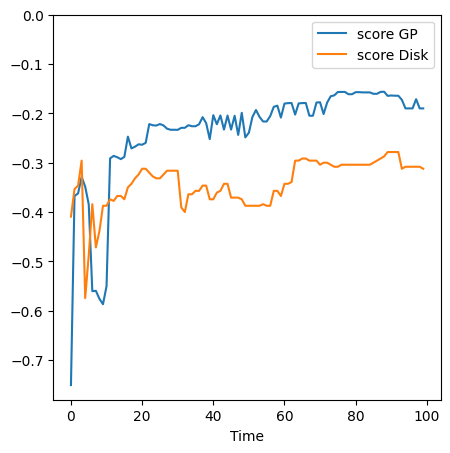

In [33]:
# plot the results
fig, ax = plt.subplots(1, figsize=(5,5))
ax.plot(scores_gp, label="score GP")
ax.plot(scores_disk, label="score Disk")
ax.set_ylim(top=0)
ax.set_xlabel("Time")
ax.legend()

In [35]:
def show_difference(env, im):
    difference = env.value - im.value
    fig, (axenv, aximval, axdiff) = plt.subplots(1, 3, figsize = (12, 4))
    axenv.imshow(env.value, vmin=0, vmax=1.0, cmap="gray")
    axenv.set_title("Environment")
    aximval.imshow(im.value, vmin=0, vmax=1.0, cmap="gray")
    aximval.set_title("IM value")
    axdiff.imshow(difference, vmin=-1.0, vmax=1.0, cmap="bwr")
    axdiff.set_title("difference")

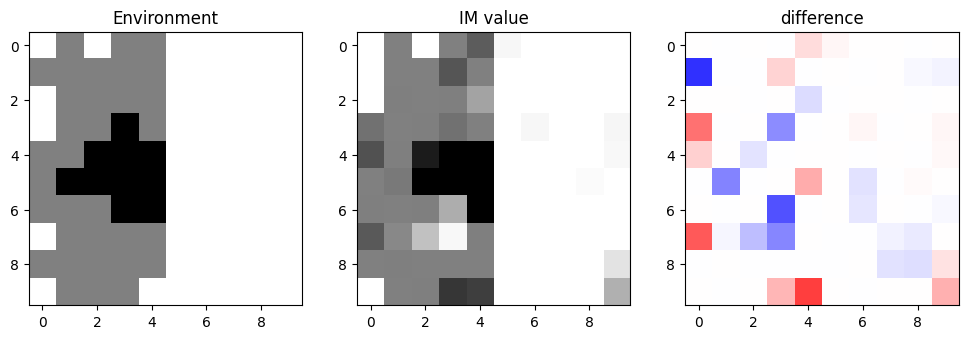

In [36]:
show_difference(env, im_gp)

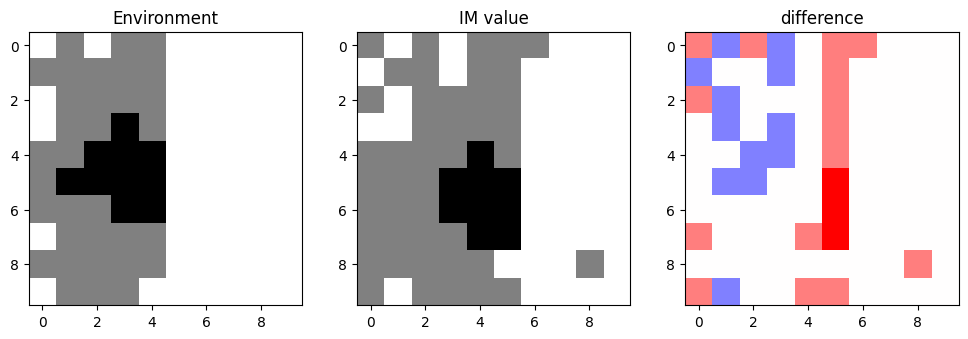

In [37]:
show_difference(env, im_disk)

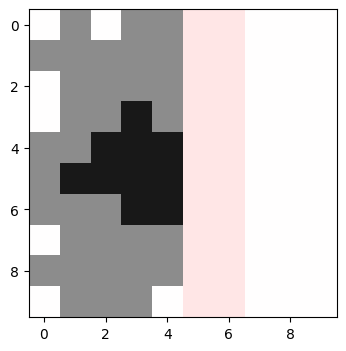

In [51]:
def show_mask(env, immunity_mask):
    fig, ax = plt.subplots(1, 1, figsize = (4, 4))
    ax.imshow(env.value, vmin=0, vmax=1.0, cmap="gray")
    immunity_val = -immunity_mask / 2.0
    ax.imshow(immunity_val, vmin=-1.0, vmax=1.0, alpha=0.1, cmap="bwr")

show_mask(env, immunity_mask)

In [40]:
immunity_mask

array([[ 0.,  0.,  0.,  0.,  0., -2., -2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -2., -2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -2., -2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -2., -2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -2., -2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -2., -2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -2., -2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -2., -2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -2., -2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -2., -2.,  0.,  0.,  0.]])